In [2]:
#imports
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import qmc
from os import path
# from self_driving_lab_demo.utils.plotting import plot_and_save

In [ ]:
pip install self_driving_lab_demo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:00105.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.2 MB/s eta 0:00:00153.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 406.3 kB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.9 MB/s eta 0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.5/946.5 kB 1.0 MB/s eta 0:00:006 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 MB 12.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 16.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 36.6 MB/s eta 0:00:000m 

In [28]:
#considering two parameter spaces:
bounds = {"x1" : [0,2], "x2" : [0,2]}
samples = 10
print (len(bounds["x1"]))
print (bounds["x2"])
print (len(bounds))

2
[0, 2]
2


In [29]:
### UNINFORMED SAMPLING METHODS :

In [30]:
# GRID Sampling :
from sklearn.model_selection import ParameterGrid

In [32]:
def gird(bounds, samples, seed = None):
    param_gd = {}
    pts_per_dim = max(1,np.floor(samples ** (1 / len(bounds))).astype(int))
    for n,b in bounds.items():
        param_gd[n] = np.linspace(b[0], b[-1], num=pts_per_dim)
    return pts_per_dim,pd.DataFrame(list(ParameterGrid(param_gd)))
pts_per_dim,_ = gird(bounds, samples, seed = None)
_,gird_samples = gird(bounds, samples, seed = None)
print("Number of points per dimension :", pts_per_dim)
print(gird_samples)
    
    

Number of points per dimension : 3
    x1   x2
0  0.0  0.0
1  0.0  1.0
2  0.0  2.0
3  1.0  0.0
4  1.0  1.0
5  1.0  2.0
6  2.0  0.0
7  2.0  1.0
8  2.0  2.0


In [34]:
pip install --upgrade nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached jsonschema-4.25.1-py3-none-any.whl (90 kB)
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

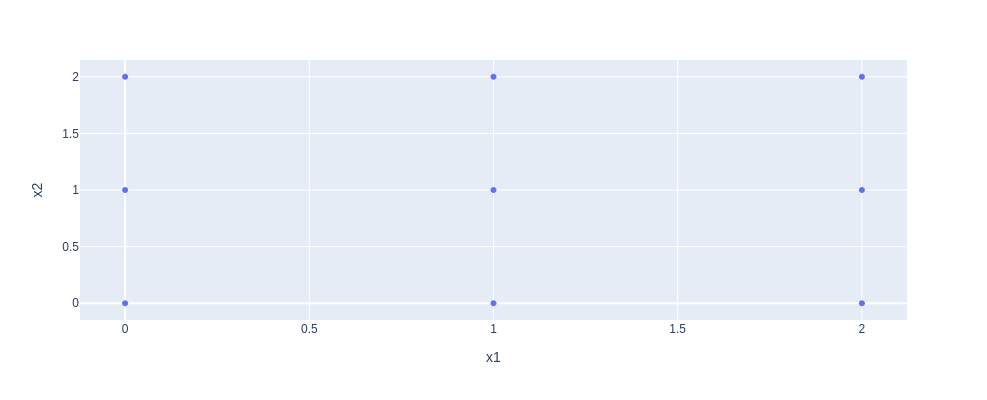

In [35]:
grd_fig = px.scatter(gird_samples,x="x1",y="x2", width = 400, height = 400)
grd_fig

In [38]:
def latin_hyp (bounds,samples,seed = None):
    sampler = qmc.LatinHypercube(d=len(bounds), optimization="random-cd", seed = seed)
    samples = sampler.random(samples)
    l_bounds = [bound[0] for bound in bounds.values()]
    u_bounds = [bound[1] for bound in bounds.values()]
    samples = qmc.scale(samples, l_bounds, u_bounds)
    return l_bounds, u_bounds, pd.DataFrame(samples, columns=list(bounds.keys()))
lb, ub, lhs = latin_hyp (bounds,samples,seed = None)
print(f"Lower bound is :{lb}, Upper bound is : {ub}")
print(lhs)

Lower bound is :[0, 0], Upper bound is : [2, 2]
         x1        x2
0  1.815599  0.507531
1  0.677824  0.651334
2  0.049116  1.016601
3  0.978780  1.997690
4  0.211176  0.325071
5  1.136684  0.058979
6  1.432379  0.824046
7  1.645439  1.617488
8  1.259180  1.244926
9  0.512844  1.591196


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

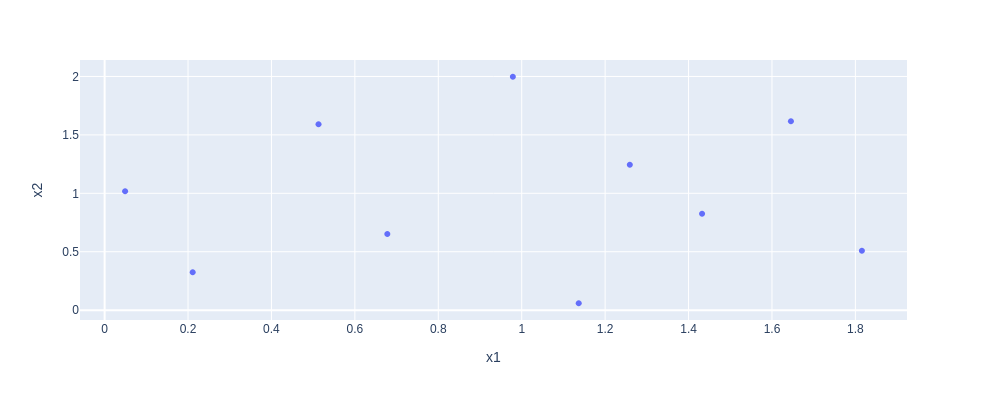

In [41]:
lhs_fg = px.scatter(lhs, x="x1",y="x2", width = 400, height = 400)
lhs_fg